<a href="https://colab.research.google.com/github/Akesh656/Akesh686/blob/main/toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [57]:
import statsmodels.formula.api as smf
model = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()

In [56]:
model.params


,0
Intercept,3868.759882
HP,-885.245573
Doors,434.412032
Cylinders,15475.039526
Gears,18077.614201


In [58]:
print(model.tvalues,'\n',model.pvalues)

Intercept     2.521200
HP          -13.819286
Doors         0.435340
Cylinders     2.521200
Gears         3.520276
dtype: float64 
 Intercept    1.180335e-02
HP           7.222722e-41
Doors        6.633813e-01
Cylinders    1.180335e-02
Gears        4.446099e-04
dtype: float64


In [59]:
(model.rsquared,model.rsquared_adj)


(0.11890155439219019, 0.11705567776033021)

In [61]:
ml_wv = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()


In [62]:


print(ml_wv.tvalues,'\n',ml_wv.pvalues)


Intercept     2.521200
HP          -13.819286
Doors         0.435340
Cylinders     2.521200
Gears         3.520276
dtype: float64 
 Intercept    1.180335e-02
HP           7.222722e-41
Doors        6.633813e-01
Cylinders    1.180335e-02
Gears        4.446099e-04
dtype: float64


In [63]:
rsq = model.rsquared
rsq_wv = ml_wv.rsquared
vif = 1/(1-rsq)
vif_wv = 1/(1-rsq_wv)
print(vif,vif_wv)

1.1349469573858664 1.1349469573858664


In [65]:
rsq_hp = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.1349469573858664

In [69]:
rsq_hp = smf.ols('Doors~HP++Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.0441052141655012

In [67]:
rsq_hp = smf.ols('HP~KM+Doors+Cylinders+Gears',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.2059170808876911

In [70]:
Vif_frame = pd.DataFrame({'Variables':['Doors','HP','Cylinders','Gears'],'VIF':[vif,vif_wv,vif_hp,vif_hp]})
Vif_frame

,Variables,VIF
0,Doors,1.134947
1,HP,1.134947
2,Cylinders,1.044105
3,Gears,1.044105


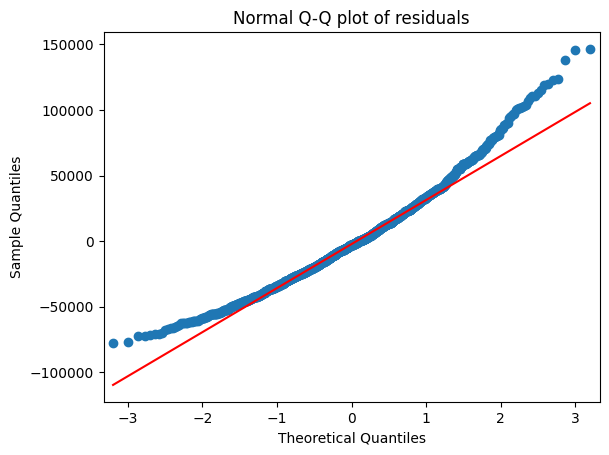

In [71]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [72]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()


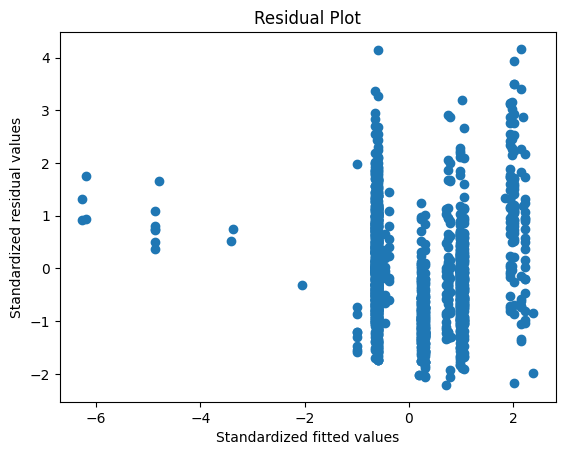

In [73]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [74]:
list(np.where(model.resid>18660))

[array([   8,   10,   11,   12,   14,   16,   43,   44,   49,   53,  141,
         186,  187,  188,  189,  190,  191,  192,  193,  194,  195,  197,
         198,  199,  200,  201,  202,  205,  206,  208,  209,  378,  379,
         380,  381,  382,  383,  384,  385,  386,  387,  388,  389,  390,
         391,  392,  393,  394,  395,  396,  397,  398,  399,  400,  402,
         403,  404,  405,  407,  408,  409,  410,  411,  413,  414,  415,
         417,  420,  424,  425,  426,  427,  428,  429,  430,  432,  433,
         435,  603,  604,  605,  606,  607,  608,  609,  610,  611,  612,
         613,  614,  615,  616,  617,  618,  619,  620,  621,  622,  623,
         624,  625,  626,  627,  628,  629,  630,  631,  632,  633,  634,
         635,  636,  637,  638,  639,  640,  641,  642,  643,  644,  645,
         646,  647,  648,  649,  650,  651,  652,  653,  654,  655,  656,
         657,  658,  659,  661,  662,  663,  664,  665,  666,  667,  668,
         669,  670,  671,  672,  673, 

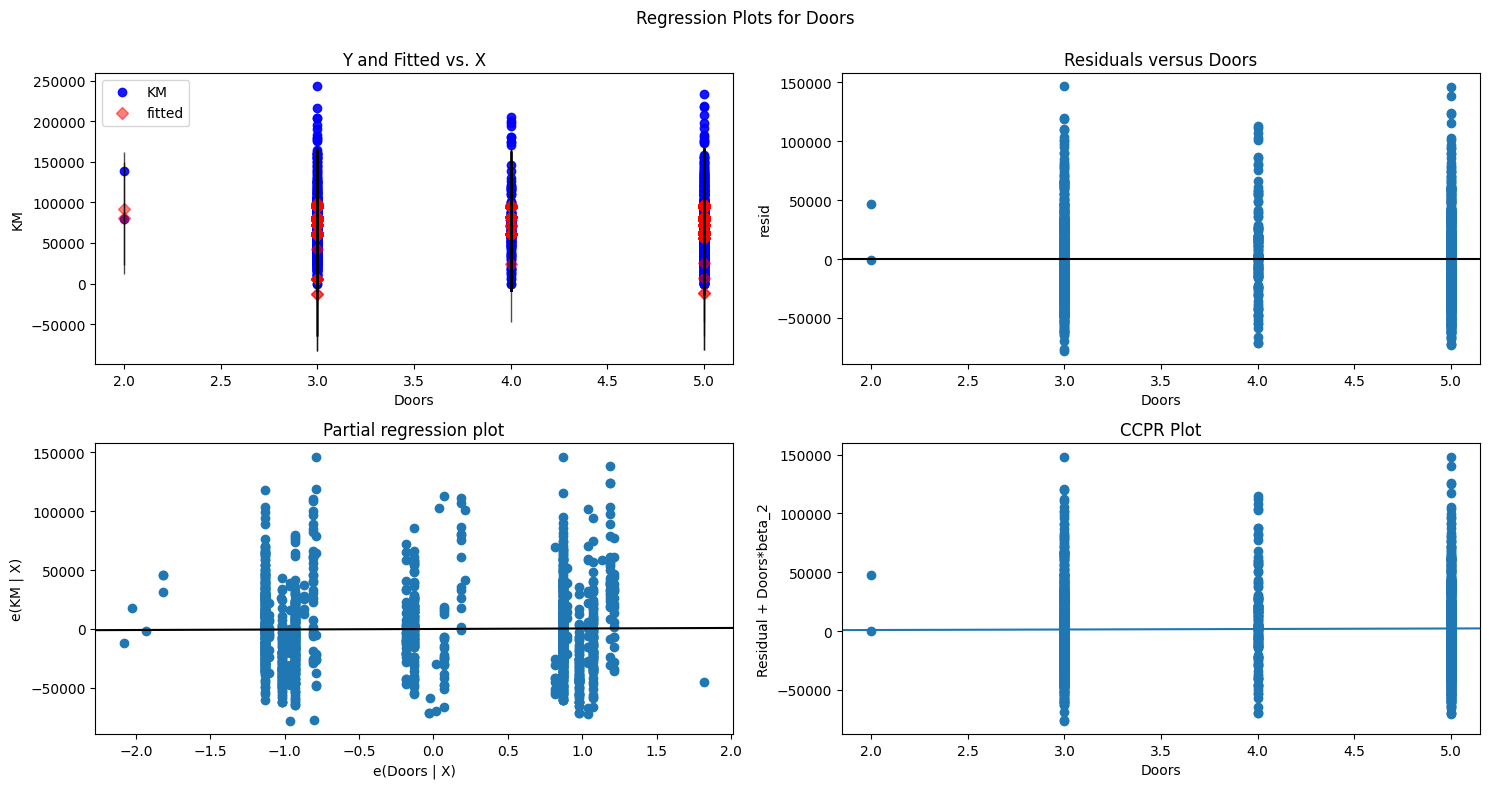

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

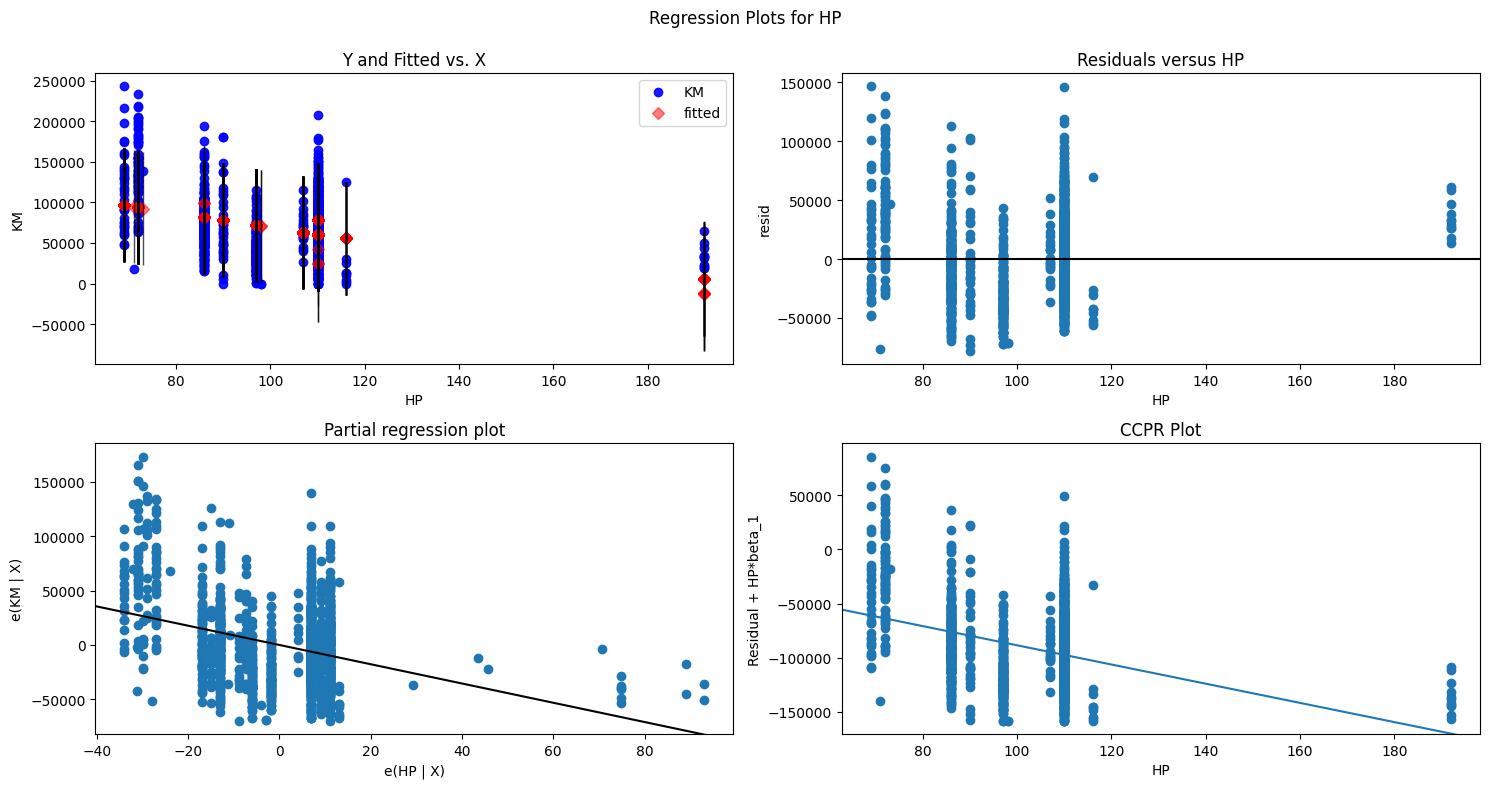

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

In [78]:
final_ml = smf.ols('KM~HP+Doors+Cylinders+Gears',data=df).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     64.41
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           4.54e-39
Time:                        07:29:19   Log-Likelihood:                -17071.
No. Observations:                1436   AIC:                         3.415e+04
Df Residuals:                    1432   BIC:                         3.417e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3868.7599   1534.491      2.521      0.012     858.668    6878.852
HP          -885.2456     64.059    -13.819      0.000   -1010.905    -759.587
Doors        434.4120    997.868      0.435      0.663   -1523.029    2391.853
Cylinders   1.548e+04   6137.965      2.521      0.012    3434.672    2.75e+04
Gears       1.808e+04   5135.283      3.520      0.000    8004.129    2.82e+04
==============================================================================
Omnibus:                      118.265   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.108
Skew:                           0.699   Prob(JB):                     3.43e-34
Kurtosis:                       3.790   Cond. No.                     2.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
final_ml_V = smf.ols("HP~KM+Gears+Doors",data = df).fit()

In [83]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.17075558854852002, 11587.209269606179)

In [85]:
final_ml = smf.ols('HP~KM+Gears+Doors',data=df).fit()

In [30]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.770368341321302, 475.9875158854609)

In [39]:
final_ml_W = smf.ols("MPG~VOL+SP+HP",data = df).fit()

In [40]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.770368341321302, 475.9875158854609)

In [86]:
final_ml_V.predict(df)

,0
0,101.962031
1,98.512578
2,102.663194
3,101.827249
4,103.090006
...,...
1431,105.476749
1432,105.681981
1433,105.945698
1434,105.958990


In [87]:
final_ml_V.predict(df)[0:5]
pred_df = pd.DataFrame(final_ml_V.predict(df))
pred_df.head()

,0
0,101.962031
1,98.512578
2,102.663194
3,101.827249
4,103.090006


In [52]:
new_data = pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[0])
